<a href="https://colab.research.google.com/github/GustavoLazoti/gtvgamer/blob/main/IA_EAD_COVID19_AprendizadoOtimizacao_Classificacao_KNN_RegressaoLogistica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color='red' size='6'>Inteligência Artificial</font>

### Projeto: Previsão de óbito por COVID-19
<font color='red' size='4'><b>Problema de Negócio</b></font>: Com base nos dados obtidos de (1), o problema de negócio é: prever se uma pessoa pode vir a óbito ou não por COVID-19.

(1) COVID-19 Mexico Patient Health Dataset. (2020, 05 19). Disponível em Kaggle.com: https://www.kaggle.com/riteshahlawat/covid19-mexico-patient-health-dataset . Data da consulta: 15 de outubro de 2020.

Fonte: YAVUZ, Ü. N. A. L.; DUDAK, Muhammed Nuri. Classification of Covid-19 Dataset with Some Machine Learning Methods. Journal of Amasya University the Institute of Sciences and Technology, v. 1, n. 1, p. 30-37.

<font color='red' size='4'><b>Aprendizado: Aplicação dos Algoritmos Knn e Regressão Logística, Avaliação, Hiperparâmetros e Geração de Modelos Preditivos</b></font>

#### <font color="black"><b>Atividade</b>: Seguir as orientações na descrição abaixo e fazer a entrega do solicitado pelo AVA da disciplina na data estipulada. Devem ser entregues: os <i>datasets</i> utilizados e gerados, o modelo salvo e este Notebook em um único arquivo compactado. Basta um integrante do grupo entregar</font>

Descrição:
<ol>
<li>Executar a análise esploratória que consta neste jupyter notebook no <i>dataset</i> "df_covid_preparados.csv".</li>
<li>Executar a normalização do atributo idade e gerar o <i>dataset</i> "df_covid_preparados_normalizados.csv", que já consta neste notebook.</li>
<li>A partir da correlação obtida com o mapa de calor no <i>dataset</i> "df_covid_preparados_normalizados.csv", gerar um novo <i>dataset</i> contendo os atributos que não possuem alta correlação positiva/negativa.</li>
<li>Realizar a execução do <i>dataset</i> pelos algoritmos Knn e Regressão Logística, estudados na teoria, com o atributo idade normalizado com e sem os atributos de alta correlação positiva/negativa</li>
<li> Escolher algum dos algoritmos executados com as melhores métricas (precisão, acurácia, f1-score, recall, matriz de confusão), ou seja, cujos resultados são mais satisfatórios (explique o motivo da escolha) e o dataset correspondente e fazer os ajustes dos seus hiperparâmetros na otimização.</li>
<li>Salvar o modelo preditivo gerado.</li>    
</ol>


### <font color="black" size='3'><b>Grupo em ordem alfabética (máx. 4 alunos) </b></font>
<html>
<table border="1px">
<tr>
<td bgcolor="Aquamarine">Nome do Aluno</td>
<td bgcolor="Aquamarine">RA</td>
</tr>
<tr>
<td bgcolor="white">nome 1</td>
<td bgcolor="white">RA 1</td>
</tr>
<tr>
<td bgcolor="white">nome 2</td>
<td bgcolor="white">RA 2</td>
</tr>
    <tr>
<td bgcolor="white">nome 3</td>
<td bgcolor="white">RA 3</td>
</tr>
        <tr>
<td bgcolor="white">nome 4</td>
<td bgcolor="white">RA 4</td>
</tr>
    </table>
</html>

In [3]:
# Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# ignora os warnings
import warnings
warnings.filterwarnings("ignore")
# Por se tratar de um conjunto de gráficos menores, pode ser mais interessante gerar os gráficos em janela separada
%matplotlib inline

# Análise Exploratória: Síntese
1. Executar a análise esploratória que consta neste jupyter notebook no <i>dataset</i> "df_covid_preparados.csv".

In [4]:
# Leitura do arquivo CSV com separador "," e codificação UTF-8
# COVID-19 Mexico Patient Health Dataset. (2020, 05 19). Retrieved
# from Kaggle.com: https://www.kaggle.com/riteshahlawat/covid19-mexico-patient-health-dataset
df_covid = pd.read_csv('/content/df_covid_preparados.csv', sep = ',', encoding = 'UTF-8')

In [5]:
# Mostra dois registros do arquivo
df_covid.head(2)

,sexo,tipo_paciente,intubado,pneumonia,idade,gravidez,diabetes,copd,asma,imunossupressao,hipertensao,outras_doencas,cardiovascular,obesidade,irc,fumante,outro_caso,teste_covid,icu,obito
0,2,1,97,2,42,97,2,2,1,2,2,2,2,2,2,2,99,1,97,0
1,1,1,97,2,51,2,2,2,2,2,2,2,2,2,2,2,99,1,97,0


In [6]:
# apresenta os tipas de dados das colunas
df_covid.dtypes

,0
sexo,int64
tipo_paciente,int64
intubado,int64
pneumonia,int64
idade,int64
gravidez,int64
diabetes,int64
copd,int64
asma,int64
imunossupressao,int64


In [7]:
# Mostra o shape do dataset
df_covid.shape

(95839, 20)

In [8]:
## Mostra a frequência absoluta de  registros do atributo sexo (intervalo: [1,2]), onde:
# 1- Mulher, 2- homem
df_covid.groupby("sexo").size()

,0
sexo,
1,47119
2,48720


In [9]:
# Mostra a frequência absoluta de  registros do atributo tipo_paciente (intervalo: [1,2]), onde:
# Tipo 1, Tipo 2
df_covid.groupby("tipo_paciente").size()

,0
tipo_paciente,
1,70268
2,25571


In [10]:
# Mostra a frequência absoluta  de  registros do atributo intubado (intervalo: [1,99]), onde:
# 1 = Sim, 2 = Não, 98/97: Não se aplica, 99: Não disponível.
df_covid.groupby("intubado").size()

,0
intubado,
1,1934
2,23613
97,70268
99,24


In [11]:
# Mostra a frequência absoluta  de  registros do atributo pneumonia (intervalo: [1,99]), onde:
# 1 = Sim, 2 = Não, 98/97: Não se aplica, 99: Não disponível.
df_covid.groupby("pneumonia").size()

,0
pneumonia,
1,17628
2,78203
99,8


<Axes: >

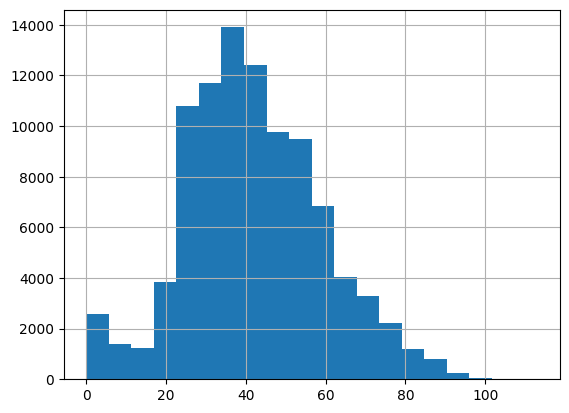

In [12]:
# Apresenta o histograma do atributo idade. Observe a distribuição e os picos.
# Considere bins como sendo o número de barras
df_covid.idade.hist(bins=20)

In [13]:
# Mostra a frequência absoluta de  registros do atributo gravidez (intervalo: [1,98]), onde:
# 1 = Sim, 2 = Não, 98/97: Não se aplica.
df_covid.groupby("gravidez").size()

,0
gravidez,
1,978
2,45909
97,48720
98,232


In [14]:
# Mostra a frequência absoluta de  registros do atributo diabetes (intervalo: [1,98]), onde:
# 1 = Sim, 2 = Não, 98/97: Não se aplica.
df_covid.groupby("diabetes").size()

,0
diabetes,
1,12878
2,82544
98,417


In [15]:
# Mostra a frequência absoluta de  registros do atributo copd (intervalo: [1,98]), onde:
# 1 = Sim, 2 = Não, 98/97: Não se aplica.
# copd = doença pulmonar obstrutiva crônica
df_covid.groupby("copd").size()

,0
copd,
1,2462
2,92973
98,404


In [16]:
# Mostra a frequência absoluta de  registros do atributo asma (intervalo: [1,98]), onde:
# 1 = Sim, 2 = Não, 98/97: Não se aplica.
df_covid.groupby("asma").size()

,0
asma,
1,4328
2,91102
98,409


In [17]:
# Mostra a frequência absoluta de  registros do atributo imunossupressao (intervalo: [1,98]), onde:
# 1 = Sim, 2 = Não, 98/97: Não se aplica.
df_covid.groupby("imunossupressao").size()

,0
imunossupressao,
1,2314
2,93099
98,426


In [18]:
# Mostra oa frequência absoluta de  registros do atributo hipertensao (intervalo: [1,98]), onde:
# 1 = Sim, 2 = Não, 98/97: Não se aplica.
df_covid.groupby("hipertensao").size()

,0
hipertensao,
1,16716
2,78721
98,402


In [19]:
# Mostra a frequência absoluta de  registros do atributo outras_doencas (intervalo: [1,98]), onde:
# 1 = Sim, 2 = Não, 98/97: Não se aplica.
df_covid.groupby("outras_doencas").size()

,0
outras_doencas,
1,4642
2,90639
98,558


In [20]:
# Mostra a frequência absoluta de  registros do atributo cardiovascular (intervalo: [1,98]), onde:
# 1 = Sim, 2 = Não, 98/97: Não se aplica.
df_covid.groupby("cardiovascular").size()

,0
cardiovascular,
1,2986
2,92437
98,416


In [21]:
# Mostra a frequência absoluta de  registros do atributo obesidade (intervalo: [1,98]), onde:
# 1 = Sim, 2 = Não, 98/97: Não se aplica.
df_covid.groupby("obesidade").size()

,0
obesidade,
1,15597
2,79852
98,390


In [22]:
# Mostra a frequência absoluta de  registros do atributo irc (intervalo: [1,98]), onde:
# 1 = Sim, 2 = Não, 98/97: Não se aplica.
# irc = insuficiência renal crônica
df_covid.groupby("irc").size()

,0
irc,
1,2287
2,93146
98,406


In [23]:
# Mostra a frequência absoluta de  registros do atributo fumante (intervalo: [1,98]), onde:
# 1 = Sim, 2 = Não, 98/97: Não se aplica.
df_covid.groupby("fumante").size()

,0
fumante,
1,9311
2,86124
98,404


In [ ]:
# Mostra a frequência absoluta de  registros do atributo outro_caso (intervalo: [1,98]), onde:
# 1 = Sim, 2 = Não, 98/97: Não se aplica.
df_covid.groupby("outro_caso").size()

outro_caso
1     29089
2     31255
99    35495
dtype: int64

In [ ]:
# Mostra a frequência absoluta de  registros do atributo teste_covid (intervalo: [1,3]), onde:
# 1 = COVID-19 Positivo, 2 = COVID-19 Negativo, 3 = Não se aplica.
df_covid.groupby("teste_covid").size()

teste_covid
1    23471
2    59704
3    12664
dtype: int64

In [ ]:
# Mostra a frequência absoluta de  registros do atributo icu (intervalo: [1,99]), onde:
# 1 = Sim, 2 = Não, 98/97: Não se aplica, 99 - Não disponivel.
# uci = unidade de terapia intensiva
df_covid.groupby("icu").size()

icu
1      2180
2     23366
97    70268
99       25
dtype: int64

In [ ]:
# Mostra a frequência absoluta de  registros do atributo obito (intervalo: [0,1]), onde:
# 1 = Sim, 2 = Não.
df_covid.groupby("obito").size()

obito
0    92404
1     3435
dtype: int64

In [ ]:
# Resumo estatístico do dataset completo
df_covid.describe()

,sexo,tipo_paciente,intubado,pneumonia,idade,gravidez,diabetes,copd,asma,imunossupressao,hipertensao,outras_doencas,cardiovascular,obesidade,irc,fumante,outro_caso,teste_covid,icu,obito
count,95839.000000,95839.000000,95839.000000,95839.000000,95839.000000,95839.000000,95839.000000,95839.000000,95839.000000,95839.000000,95839.000000,95839.000000,95839.000000,95839.000000,95839.000000,95839.000000,95839.000000,95839.000000,95839.000000,95839.000000
mean,1.508353,1.266812,71.656966,1.824163,42.052734,50.515677,2.283329,2.378990,2.364528,2.402571,2.228258,2.510502,2.385542,2.227913,2.382819,2.307526,37.621469,1.887238,71.655412,0.035841
std,0.499933,0.442296,42.039542,0.968724,17.318496,47.502147,6.336700,6.223473,6.264395,6.389617,6.227323,7.310702,6.315538,6.133032,6.238525,6.233148,47.076124,0.603595,42.043316,0.185895
min,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,1.000000,1.000000,2.000000,2.000000,30.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,0.000000
50%,2.000000,1.000000,97.000000,2.000000,41.000000,97.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,97.000000,0.000000
75%,2.000000,2.000000,97.000000,2.000000,53.000000,97.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,99.000000,2.000000,97.000000,0.000000
max,2.000000,2.000000,99.000000,99.000000,113.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,99.000000,3.000000,99.000000,1.000000


In [ ]:
# Resumo estatístico dos que faleceram
df_covid[df_covid.obito == 1].describe()

,sexo,tipo_paciente,intubado,pneumonia,idade,gravidez,diabetes,copd,asma,imunossupressao,hipertensao,outras_doencas,cardiovascular,obesidade,irc,fumante,outro_caso,teste_covid,icu,obito
count,3435.000000,3435.000000,3435.000000,3435.000000,3435.000000,3435.000000,3435.000000,3435.000000,3435.000000,3435.000000,3435.000000,3435.000000,3435.000000,3435.000000,3435.000000,3435.000000,3435.000000,3435.000000,3435.000000,3435.0
mean,1.645706,1.913828,9.968268,1.276565,58.684716,63.563610,2.493741,2.773508,2.838137,2.976419,2.381659,3.091412,2.889083,2.378748,2.690539,2.873362,54.148763,1.428530,10.023290,1.0
std,0.478368,0.280658,26.732620,0.447364,17.266434,45.381534,9.275606,9.093441,9.084153,9.919817,8.838100,10.564488,9.655552,7.864280,8.646390,9.657801,48.463608,0.596828,26.715122,0.0
min,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0
25%,1.000000,2.000000,2.000000,1.000000,49.000000,2.000000,1.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,1.000000,2.000000,1.0
50%,2.000000,2.000000,2.000000,1.000000,60.000000,97.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,99.000000,1.000000,2.000000,1.0
75%,2.000000,2.000000,2.000000,2.000000,70.500000,97.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,99.000000,2.000000,2.000000,1.0
max,2.000000,2.000000,97.000000,2.000000,100.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,99.000000,3.000000,97.000000,1.0


In [ ]:
# Resumo estatístico dos que sobrevireram
df_covid[df_covid.obito == 0].describe()

,sexo,tipo_paciente,intubado,pneumonia,idade,gravidez,diabetes,copd,asma,imunossupressao,hipertensao,outras_doencas,cardiovascular,obesidade,irc,fumante,outro_caso,teste_covid,icu,obito
count,92404.000000,92404.000000,92404.000000,92404.000000,92404.000000,92404.000000,92404.000000,92404.000000,92404.000000,92404.000000,92404.000000,92404.000000,92404.000000,92404.000000,92404.000000,92404.000000,92404.000000,92404.000000,92404.000000,92404.0
mean,1.503247,1.242760,73.950164,1.844520,41.434462,50.030637,2.275508,2.364324,2.346922,2.381239,2.222555,2.488907,2.366824,2.222306,2.371380,2.286492,37.007088,1.904290,73.946507,0.0
std,0.499992,0.428754,40.739893,0.976889,17.009850,47.510361,6.200591,6.090350,6.134006,6.218943,6.108792,7.160478,6.155830,6.059129,6.130579,6.067763,46.911912,0.597093,40.747660,0.0
min,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0
25%,1.000000,1.000000,97.000000,2.000000,30.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,97.000000,0.0
50%,2.000000,1.000000,97.000000,2.000000,40.000000,97.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,97.000000,0.0
75%,2.000000,1.000000,97.000000,2.000000,52.000000,97.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,99.000000,2.000000,97.000000,0.0
max,2.000000,2.000000,99.000000,99.000000,113.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,99.000000,3.000000,99.000000,0.0


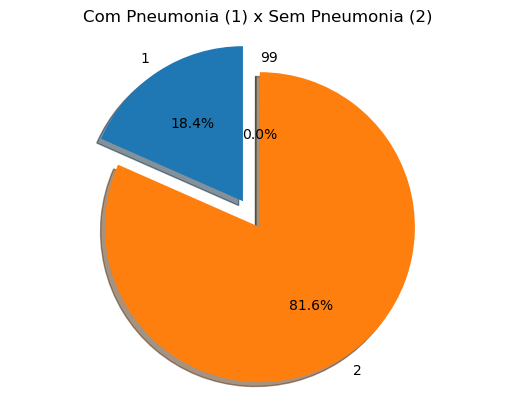

In [ ]:
# Obtém a frequência absoluta de pessoas com pneumonia
serie_pneumonia = df_covid.groupby("pneumonia").size()

# coloca "explode" com 0 em todos os índices, exceção o índece 0 com o valor 0.2
explode = tuple(0 if i != 0 else 0.2 for i in range(serie_pneumonia.size))

plt.pie(serie_pneumonia.values, explode=explode, labels=serie_pneumonia.index,
        autopct='%1.1f%%', shadow=True, startangle=90)
# equal garante que o gráfico seja desenhado como um círculo.
plt.axis('equal')
plt.title("Com Pneumonia (1) x Sem Pneumonia (2)")

plt.show()

### Realizando a normalização da idade
2. Executar a normalização do atributo idade e gerar o <i>dataset</i> "df_covid_preparados_normalizados.csv", que já consta abaixo.

<b>Teoria</b>: Normalização dos dados é uma técnica usada para ajustar a escala dos dados de modo que todos os valores fiquem dentro de uma mesma faixa, geralmente entre 0 e 1 ou com média 0 e desvio padrão 1, dependendo da técnica utilizada. Isso é importante principalmente quando você está lidando com algoritmos de machine learning que são sensíveis à escala dos dados — como redes neurais, k-means, regressão logística, entre outros.<br><br>
<b>Por que normalizar?</b>
Imagine um conjunto de dados com duas variáveis:<br>

<b>Altura (em metros)</b>: varia de 1.50 a 2.00<br>

<b>Renda (em reais)</b>: varia de 1.000 a 50.000<br>

A diferença de escala entre essas variáveis pode fazer com que algoritmos deem muito mais importância à variável com valores maiores, o que distorce o aprendizado.<br>

<b>Tipos comuns de normalização:</b> Min-Max Scaling (normalização no intervalo [0, 1]) e  Z-score (Padronização). Min-Max Scaling deve ser utilizado quando você sabe que os dados têm limites bem definidos ou vai usar modelos como redes neurais. Z-score quando você quer preservar outliers ou quando os dados seguem uma distribuição normal.<br>

Para a normalização dos dados da IDADE será utilizado  Min-Max Scaling (normalização no intervalo [0, 1]) para evitar distorção em relação aos outros dados que tem valores no intervalo [0, 1].

In [24]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(df_covid[['idade']])
print(scaler.transform(df_covid[['idade']]))

[[0.37168142]
 [0.45132743]
 [0.45132743]
 ...
 [0.57522124]
 [0.42477876]
 [0.20353982]]


In [26]:
df_covid.head(2)

,sexo,tipo_paciente,intubado,pneumonia,idade,gravidez,diabetes,copd,asma,imunossupressao,hipertensao,outras_doencas,cardiovascular,obesidade,irc,fumante,outro_caso,teste_covid,icu,obito
0,2,1,97,2,42,97,2,2,1,2,2,2,2,2,2,2,99,1,97,0
1,1,1,97,2,51,2,2,2,2,2,2,2,2,2,2,2,99,1,97,0


In [25]:
# montando os dados com a idade normalizada , 'scaled'
covid_scaled = pd.DataFrame(scaler.transform(df_covid[['idade']]),columns=df_covid.columns[4:5])
covid_scaled

,idade
0,0.371681
1,0.451327
2,0.451327
3,0.504425
4,0.389381
...,...
95834,0.522124
95835,0.442478
95836,0.575221
95837,0.424779


In [ ]:
# Concatena os dados de df_covid com a idade normalizada
covid_scaled = pd.concat([df_covid[['sexo', 'tipo_paciente', 'intubado', 'pneumonia']],covid_scaled[['idade']]],axis=1)
display(covid_scaled)

,sexo,tipo_paciente,intubado,pneumonia,idade
0,2,1,97,2,0.371681
1,1,1,97,2,0.451327
2,2,2,2,2,0.451327
3,2,2,2,2,0.504425
4,1,2,2,2,0.389381
...,...,...,...,...,...
95834,2,2,2,2,0.522124
95835,2,2,2,2,0.442478
95836,1,2,2,2,0.575221
95837,1,1,97,2,0.424779


In [ ]:
df_covid.head(2)

,sexo,tipo_paciente,intubado,pneumonia,idade,gravidez,diabetes,copd,asma,imunossupressao,hipertensao,outras_doencas,cardiovascular,obesidade,irc,fumante,outro_caso,teste_covid,icu,obito
0,2,1,97,2,42,97,2,2,1,2,2,2,2,2,2,2,99,1,97,0
1,1,1,97,2,51,2,2,2,2,2,2,2,2,2,2,2,99,1,97,0


In [ ]:
# Concatena os restantes dos dados com a idade normalizada
covid_scaled = pd.concat([covid_scaled[['sexo', 'tipo_paciente', 'intubado', 'pneumonia', 'idade']],
                          df_covid[['gravidez', 'diabetes', 'copd', 'asma','imunossupressao', 'hipertensao', 'outras_doencas', 'cardiovascular', 'obesidade', 'irc','fumante', 'outro_caso', 'teste_covid', 'icu', 'obito' ]]],axis=1)
display(covid_scaled)

,sexo,tipo_paciente,intubado,pneumonia,idade,gravidez,diabetes,copd,asma,imunossupressao,hipertensao,outras_doencas,cardiovascular,obesidade,irc,fumante,outro_caso,teste_covid,icu,obito
0,2,1,97,2,0.371681,97,2,2,1,2,2,2,2,2,2,2,99,1,97,0
1,1,1,97,2,0.451327,2,2,2,2,2,2,2,2,2,2,2,99,1,97,0
2,2,2,2,2,0.451327,97,1,2,2,2,1,2,2,1,2,2,99,1,2,0
3,2,2,2,2,0.504425,97,1,2,2,2,2,2,2,2,2,2,99,1,2,1
4,1,2,2,2,0.389381,2,1,2,2,2,2,2,2,2,2,2,2,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95834,2,2,2,2,0.522124,97,2,2,2,2,2,2,2,2,2,2,99,3,2,0
95835,2,2,2,2,0.442478,97,1,2,2,1,1,2,2,2,1,2,99,3,2,0
95836,1,2,2,2,0.575221,2,2,2,2,2,1,2,2,2,2,2,99,3,2,0
95837,1,1,97,2,0.424779,2,2,2,2,2,2,2,2,2,2,2,1,3,97,0


In [ ]:
# atribui dados normalizados ao dataframe original
df_covid = covid_scaled
df_covid.head(2)

,sexo,tipo_paciente,intubado,pneumonia,idade,gravidez,diabetes,copd,asma,imunossupressao,hipertensao,outras_doencas,cardiovascular,obesidade,irc,fumante,outro_caso,teste_covid,icu,obito
0,2,1,97,2,0.371681,97,2,2,1,2,2,2,2,2,2,2,99,1,97,0
1,1,1,97,2,0.451327,2,2,2,2,2,2,2,2,2,2,2,99,1,97,0


In [ ]:
# Grava os dados da covid após a normalização da idade
df_covid.to_csv("df_covid_preparados_normalizados.csv", index=False)

#### Correlação entre os atributos

A correlação é o relacionamento entre 2 variáveis. O método mais comum para calcular correlação é o método de Pearson, que assume uma distribuição normal dos dados. Correlação de -1 mostra uma correlação negativa, enquanto uma correlação de +1 mostra uma correlação positiva. Uma correlação igual a 0 mostra que não há relacionamento entre as variáveis.

Alguns algoritmos como regressão linear e regressão logística podem apresentar problemas de performance se houver atributos altamente correlacionados (colineares).

<b>Efeitos de alta correlação em modelos:</b><br>
1. <b> Multicolinearidade:</b> Quando duas ou mais variáveis explicativas (preditoras) estão altamente correlacionadas entre si, temos multicolinearidade. Isso é problemático para modelos como: Regressão linear, Regressão logística e SVM com kernel linear.<br>

As consequências são: os coeficientes ficam instáveis, difíceis de interpretar; a variância dos coeficientes aumenta; pode haver overfitting; e dificulta a compreensão de quais variáveis são realmente importantes.<br>

2. <b>Redundância de informação</b>: em modelos como árvores de decisão, random forest ou redes neurais, a multicolinearidade não é tão prejudicial, mas ainda assim pode levar a: maior complexidade desnecessária; aumento do tempo de treinamento; e menor interpretabilidade.<br>

<b>O que fazer neste cenário?</b> Sugere-se: remoção de variáveis redundantes; ou uso de técnicas de redução de dimensionalidade. No nosso caso, vamos remover variáveis reduantes (ou com alta correlação positiva - próxima de 1 - ou alta correção negativa - próxima de -1, no heatmap - mapa de calor.)

<Axes: >

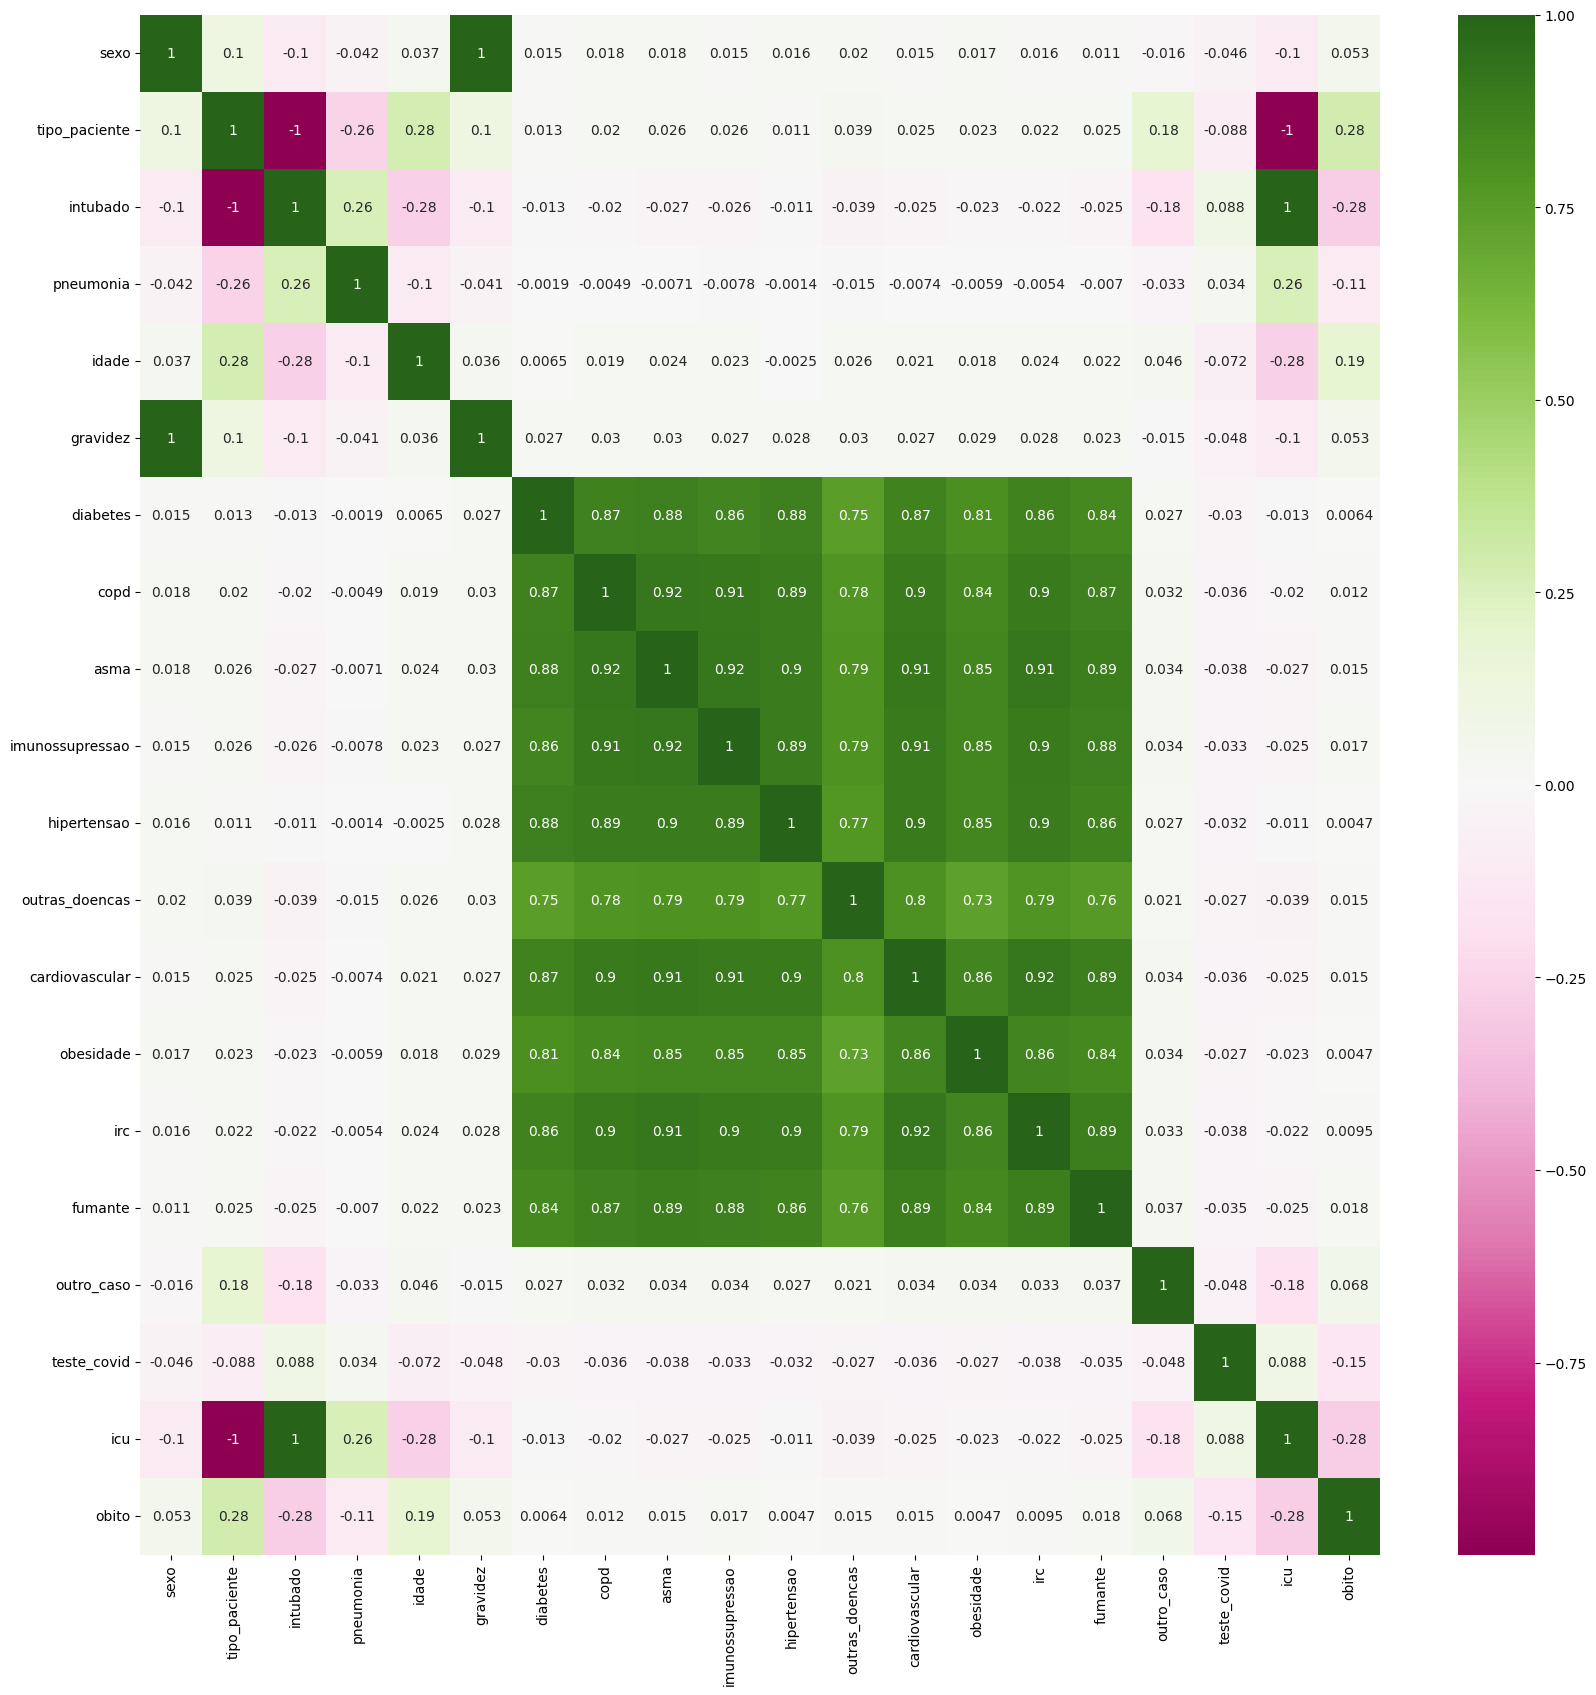

In [27]:
# Cria mapa de calor com a correlação do dataset com o mapa ce cores PiYG
# Aumenta o tamanho da figura a ser exibida
plt.figure(figsize=(20,20))
sns.heatmap(df_covid.corr(), annot=True, cmap = "PiYG")

### Tendo por base os resultados obtidos no mapa de calor (heat map) da correlação acima.

3. A partir da correlação obtida com o mapa de calor no <i>dataset</i> "df_covid_preparados_normalizados.csv", gerar um novo <i>dataset</i> contendo os atributos que não possuem alta correlação positiva/negativa. <br>
   
Você removeria algum atributo com alta correlação positiva ou negativa? Qual ou quais? Escreva no comentário abaixo indicando o motivo (alta correlação positiva ou negativa).

In [ ]:
# indique abaixo qual(is) atributo(s) devem ser removido(s) e motivo.

In [ ]:
##### PREENCHER AQUI

### Elimine um ou mais atributos com alta correlação positiva ou negativa, salve o <i>dataset</i>
E faça os testes a seguir considerando o <i>dataset</i> com e sem o(s) atributo(s)

In [ ]:
# monte abaixo o dataset sem o(s) atributo(s) correlacionado(s)

In [ ]:
##### REMOVER OS ATRIBUTOS AQUI

In [ ]:
# Salve o dataset sem os atributos com alta correlação positiva/negativa
df_covid.to_csv("df_covid_preparados_normalizados_semAtrCorr.csv", index=False)

# Aprendizado Supervisionado: Algoritmos de Classificação

Não há como saber qual algoritmo vai funcionar melhor na construção do modelo, antes de realizar os testes do algoritmo com os dados de testes do </i>dataset</i>.

O ideal é testar alguns algoritmos e então escolher aquele que fornece melhor nível de precisão.

Para isso, serão considerados os algoritmos de classificação:

1) <i>K-Nearest Neighbors</i> (KNN)<br />
Documentação: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html.

2) Regressão Logística <br />
Documentação: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html.

Os dois algoritmos serão utilizados juntos com os mesmos dados de treino e teste.

As métricas utilizadas serão acurácia com matriz de confusão e classification report.

### Dados de Treino e de Teste

Documentação: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

Este é o método mais utilizado para avaliar performance de um algoritmo de Machine Learning.

Dividimos nossos dados originais em dados de treino e de teste.

Treinamos o algoritmo nos dados de treino e fazemos as previsões nos dados de teste e avaliamos o resultado.

A divisão dos dados vai depender do seu dataset, mas utiliza-se com frequência tamanhos entre 70/30 (treino/teste) e 80/20 (treino/teste).

Este método é bem veloz e ideal para conjuntos de dados muito grandes.

O ponto negativo é a possibilidade de alta variância.

## Avaliando a Performance


As métricas que você escolhe para avaliar a performance do modelo vão influenciar a forma como a performance é medida e comparada com modelos criados com outros algoritmos.

Vamos utilizar o mesmo algoritmo, mas com métricas diferentes e assim comparar os resultados.

### Métricas para Algoritmos de Classificação

Documentação: https://scikit-learn.org/stable/modules/model_evaluation.html.

#### IMPORTANTE: Faça os testes com o <i>dataset</i> considerando a idade normalizada com e sem os atributos com alta correlação positiva/negativa

4. Realizar a execução do <i>dataset</i> pelos algoritmos Knn e Regressão Logística, estudados na teoria, com o atributo idade normalizado com e sem os atributos de alta correlação positiva/negativa

In [ ]:
# Import dos módulos
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Importando os módulos dos algoritmos
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [ ]:
# Leitura do arquivo CSV com separador "," e codificação UTF-8
# COVID-19 Mexico Patient Health Dataset. (2020, 05 19). Retrieved
# from Kaggle.com: https://www.kaggle.com/riteshahlawat/covid19-mexico-patient-health-dataset
df_covid = pd.read_csv('df_covid_preparados_normalizados_semAtrCorr.csv', sep = ',', encoding = 'UTF-8')

In [ ]:
# Obtém os dados do câncer de mama
array = df_covid.values

In [ ]:
# Obtém o total de colunas (atributos) do dataset
colunas_df = len(df_covid.columns)

In [ ]:
# Separando o array em componentes de entrada (atributos preditivos) e output (atributo alvo)
X = array[:,0:colunas_df-1] # Atributos Preditores selecionados de 0 a 19 (exclusivo)
Y = array[:,colunas_df-1] # Atributo alvo: obito (1 - sim, 0 - não)

In [ ]:
# Definindo o tamanho das amostras
teste_size = 0.30

# Garante que os resultados podem ser reproduzidos
# Isso é importante para comparar a acurácia com outros algoritmos de Machine Learning.
seed = 7

In [ ]:
# Criando os conjuntos de dados de treino e de teste
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, Y, test_size = teste_size, random_state = seed)

In [ ]:
# Preparando a lista de modelos instanciados
modelos = []
modelos.append(('KNN', KNeighborsClassifier()))
modelos.append(('LR', LogisticRegression()))

In [ ]:
# Avaliando cada modelo em um loop
dicAcuracia = {}
dicMatriz = {}
dicRelatorio = {}

for nome, modelo in modelos:
    # Treinamento do modelo
    modelo.fit(X_treino, Y_treino)
    # Fazendo as previsões e construindo a Matriz de Confusão
    previsoes = modelo.predict(X_teste)
    # Obtendo a matriz de confusão
    matrix = confusion_matrix(Y_teste, previsoes)
    # construindo o relatório de resultados
    report = classification_report(Y_teste, previsoes)
    # Score do modelo nos dados de teste  (Acurácia)
    acuracia = modelo.score(X_teste, Y_teste)
    # Criando dicionários para a acurácia matriz de confusão e relatório
    dicAcuracia[nome] = acuracia*100.0
    dicMatriz[nome] = matrix
    dicRelatorio[nome] = report

In [ ]:
# Montando um dataframe com a acurácia obtida de cada modelo
pdAcuraciaModelos = pd.DataFrame(dicAcuracia.items())
pdAcuraciaModelos.columns = ['nome','acuracia']

In [ ]:
# Apresenta a acurácia dos modelos ordenados
pdAcuraciaModelos.sort_values(ascending=False, by='acuracia')

,nome,acuracia
1,LR,96.382860
0,KNN,96.264608


In [ ]:
modelos.append(('KNN', KNeighborsClassifier()))
modelos.append(('LR', LogisticRegression()))

In [ ]:
# Apresenta a matriz de confusão para o KNN
dicMatriz['KNN']

array([[27536,   176],
       [  898,   142]], dtype=int64)

In [ ]:
# Apresenta a matriz de confusão para o Regressão Logística
dicMatriz['LR']

array([[27709,     3],
       [ 1037,     3]], dtype=int64)

In [ ]:
# Apresenta o relatório para o Knn
print(dicRelatorio['KNN'])

              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98     27712
         1.0       0.45      0.14      0.21      1040

    accuracy                           0.96     28752
   macro avg       0.71      0.57      0.60     28752
weighted avg       0.95      0.96      0.95     28752



In [ ]:
# Apresenta o relatório para o Regressão Logística
print(dicRelatorio['LR'])

              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98     27712
         1.0       0.50      0.00      0.01      1040

    accuracy                           0.96     28752
   macro avg       0.73      0.50      0.49     28752
weighted avg       0.95      0.96      0.95     28752



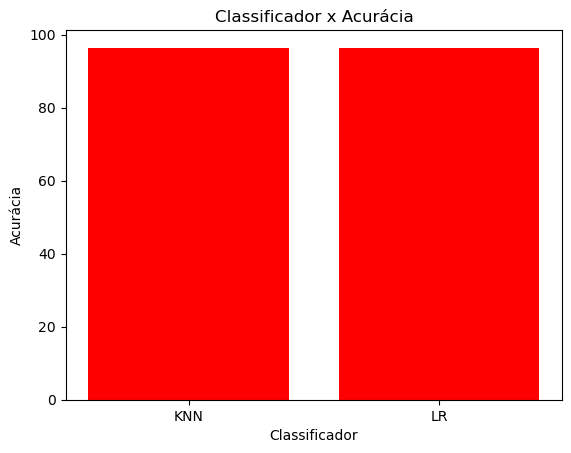

In [ ]:
# Gráfico de barras para comparar a acurácia entre os modelos
plt.bar(list(dicAcuracia.keys()), dicAcuracia.values(), color='red')
# legenda do eixo x
plt.xticks(list(dicAcuracia.keys()))
# Label eixo Y
plt.ylabel('Acurácia')
# Label eixo X
plt.xlabel('Classificador')
# Título do gráfico
plt.title('Classificador x Acurácia')
# mostra o gráfico
plt.show()

# Otimização do Modelo - Ajuste de Hyperparâmetros
<font color='red' size='4'><b>Escolha um algoritmo para realizar o ajuste de parâmetros</b></font>

Todos os algoritmos de Aprendizado de Máquina são parametrizados, o que significa que você pode ajustar a performance do seu modelo preditivo, através do <i>tuning</i> (ajuste fino) dos parâmetros.

Seu trabalho é encontrar a melhor combinação entre os parâmetros em cada algoritmo de Aprendizado de Máquina.

Esse processo também é chamado de Otimização Hyperparâmetro.

O scikit-learn oferece dois métodos para otimização automática dos parâmetros, mas aqui utilizaremos o <i>Grid Search Parameter Tuning</i>.

### Grid Search Parameter Tuning

Documentação: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html.

Este método realiza metodicamente combinações entre todos os parâmetros do algoritmo, criando um grid.

Realize o método utilizando um dos algoritmos (KNN ou Regressão Logística) selecionados.

5. Escolher algum dos algoritmos executados com as melhores métricas (precisão, acurácia, f1-score, recall, matriz de confusão), ou seja, cujos resultados são mais satisfatórios (explique o motivo da escolha) e o dataset correspondente e fazer os ajustes dos seus hiperparâmetros na otimização.

In [ ]:
# Import dos módulos
import numpy as np

# Uma variável aleatória contínua uniforme.
# No formulário padrão, a distribuição é uniforme em [0, 1].
# Usando os parâmetros loc e scale, obtém-se a distribuição uniforme em [loc, loc + scale].
from scipy.stats import uniform

# Import dos módulos
import numpy as np
from sklearn.model_selection import GridSearchCV

# Importando os módulos dos algoritmos
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [ ]:
# Leitura do arquivo CSV com separador "," e codificação UTF-8
# COVID-19 Mexico Patient Health Dataset. (2020, 05 19). Retrieved
# from Kaggle.com: https://www.kaggle.com/riteshahlawat/covid19-mexico-patient-health-dataset
df_covid = pd.read_csv('df_covid_preparados_normalizados_semAtrCorr.csv', sep = ',', encoding = 'UTF-8')

In [ ]:
# Obtém os dados
array = df_covid.values

# Obtém o total de colunas (atributos) do dataset
colunas_df = len(df_covid.columns)

# Separando o array em componentes de entrada (atributos preditivos) e output (atributo alvo)
X = array[:,0:colunas_df-1] # Atributos Preditores selecionados de 0 a 19 (exclusivo)
Y = array[:,colunas_df-1] # Atributo alvo: obito (1 - sim, 0 - não)

In [ ]:
# Definindo os valores que serão testados
valores_grid = { } #### Coloque aqui as variações para os hiperparâmetros que irá testar
seed = 7

In [ ]:
# Instanciando o modelo
modelo = #### Coloque aqui o modelo que irá utilizar

In [ ]:
# Instanciando o GridSearchCV
grid = GridSearchCV(estimator = modelo, param_grid = valores_grid)

In [ ]:
# Faz o fit para encontrar os melhores valores para os parâmetros
grid.fit(X, Y)

In [ ]:
# Print do resultado
print("Melhores Parâmetros do Modelo:\n", rsearch.best_estimator_)

# Salvando o modelo

O modelo deve ser obtido pelo algoritmo utilizado na etapa anterior, otimização do modelo, com os melhores valores para os seus hiperparâmetros.

6. Salvar o modelo preditivo gerado.

In [ ]:
# Import dos módulos
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Importando o módulo do algoritmo selecionado
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# Importando o pacote utilizado para salvar o modelo como arquivo binário
import joblib

In [ ]:
# Leitura do arquivo CSV com separador "," e codificação UTF-8
# COVID-19 Mexico Patient Health Dataset. (2020, 05 19). Retrieved
# from Kaggle.com: https://www.kaggle.com/riteshahlawat/covid19-mexico-patient-health-dataset
df_covid = pd.read_csv('df_covid_preparados_normalizados_semAtrCorr.csv', sep = ',', encoding = 'UTF-8')

In [ ]:
# Carregando os dados
array = df_covid.values

In [ ]:
# Obtém o total de colunas (atributos) do dataset
colunas_df = len(df_covid.columns)

In [ ]:
# Separando o array em componentes de entrada (atributos preditivos) e output (atributo alvo)
X = array[:,0:colunas_df-1] # Atributos Preditores selecionados de 0 a 19 (exclusivo)
Y = array[:,colunas_df-1] # Atributo alvo: obito (1 - sim, 0 - não)

In [ ]:
# Definindo o tamanho das amostras
teste_size = 0.30

# Garante que os resultados podem ser reproduzidos
# Isso é importante para comparar a acurácia com outros algoritmos de Machine Learning.
seed = 7

In [ ]:
# Criando os conjuntos de dados de treino e de teste
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, Y, test_size = teste_size, random_state = seed)

In [ ]:
# Criando o objeto que vai obter o modelo
#  Fazendo uso dos melhores valores dos parâmetros obtidos com o Grid Search Parameter Tuning
modelo = #### Coloque aqui o modelo que irá utilizar com os melhores valores para os hiperparâmetros testados

In [ ]:
# Treinamento do modelo
modelo.fit(X_treino, Y_treino)

In [ ]:
# Salvar O NOME DO ARQUIVO do modelo, compatível com o algoritmo escolhido.
arquivo = 'modelo_NOMEDOALGORITMO_class_obitoCOVID.sav'
joblib.dump(modelo, arquivo)
print("Modelo salvo!")

In [ ]:
# Carregando o arquivo
modelo_class_final = joblib.load(arquivo)
print("Modelo carregado!")

In [ ]:
# Fazendo previsões
Y_pred = modelo_class_final.predict(X_teste)

In [ ]:
# Obtendo a matriz de confusão
matrix = confusion_matrix(Y_teste, Y_pred); matrix

In [ ]:
# Score do modelo nos dados de teste  (Acurácia)
result = modelo_class_final.score(X_teste, Y_teste)

In [ ]:
# Imprime os resultados
print("Acurácia nos Dados de Teste: %.3f%%" % (result * 100.0))

### <font size = '2'>Baseado no material do prof. Dr. Ivan Carlos Alcântara de Oliveira</font> - <font color="blue" size = '2'>https://orcid.org/0000-0002-6020-7535</font><font size = '2'> - e-mail: ivan.oliveira@mackenzie.br</font>